# En notebook for å lage clustre fra kollokasjoner

Ord danner clustre via en kollokasjonsanalyse. Her litt engelsk forklaring:

The term collocation has traditionally been restricted to words that are juxtaposed together as phrases like “strong coffee”, “strict regime” or “eat dinner”. Here we take collocations to be realized as skipgrams, or as word pairs that simply cooccur within a context which in itself is a contiguous sequence of words, typically a paragraph or a window of n words around a given word. Juxtaposed collocates will also be part of the result set. 

The collocates for a word are those words that are associated with it based on a particular measure of association. Collocations can be viewed as discourse markers for a given word, in the sense that the collocates are deemed to have a special meaning when uttered (written or spoken) together with it, so that the word with its collocates constitute a complex sign. 



Start med å importere de kommandoene som trengs fra nbtext og graph_networkx_louvain. Den siste har funksjonalitet for å lage grafer fra clustre.

In [1]:
from module_update import update

Updated file nbtext.py
Updated file nbpictures.py


In [29]:
update('graph_networkx_louvain')

Updated file graph_networkx_louvain.py


In [27]:
import nbtext as nb
from nbtext import cloud, get_urn, Cluster, Corpus
import graph_networkx_louvain as gnl
%matplotlib inline

In [30]:
import imp
imp.reload(gnl)

<module 'graph_networkx_louvain' from 'C:\\Users\\larsj\\Documents\\NB_API_Python-master\\graph_networkx_louvain.py'>

### Definer et cluster for et ord over en gitt periode fra bøker eller aviser

In [4]:
mcluster = Cluster(
    'Jesus', 
    period=(1970, 1980), 
    before=5, 
    after=5, 
    corpus='bok',
    reference=150, 
    word_samples=500)

# Inspiser clustre

Hvilke ord er knyttet til clustringsordet, er det variasjon i kontekst, trengs det mer data. Er resultatet tolkbart?

In [5]:
mcluster.cluster_set(top=50, exponent=1.01, aslist=False)

,Jesus
Kristus,1.914212
om,1.911193
ikke,1.903213
de,1.901913
har,1.899951
hadde,1.897069
Det,1.897030
sa,1.897030
Jesus,1.894817
Men,1.894141


In [6]:
mcluster.search_words('Herre Kristus Pilatus bønn katekisme . , ; : og i på',exponent=1.01)

,Jesus
Kristus,1.914212
Herre,1.894095
Pilatus,1.847428
:,1.836060
bønn,1.828288
på,1.520002
og,0.388318
i,0.363060
.,0.332167
;,0.287004


# Tegn en ordsky


kommandoen for å tegne en ordsky er *cloud()*. Argumentet kan være mange ting, så lenge det kobler et ord til et tall. Datarammer som består av en kolonne fungerer fint.

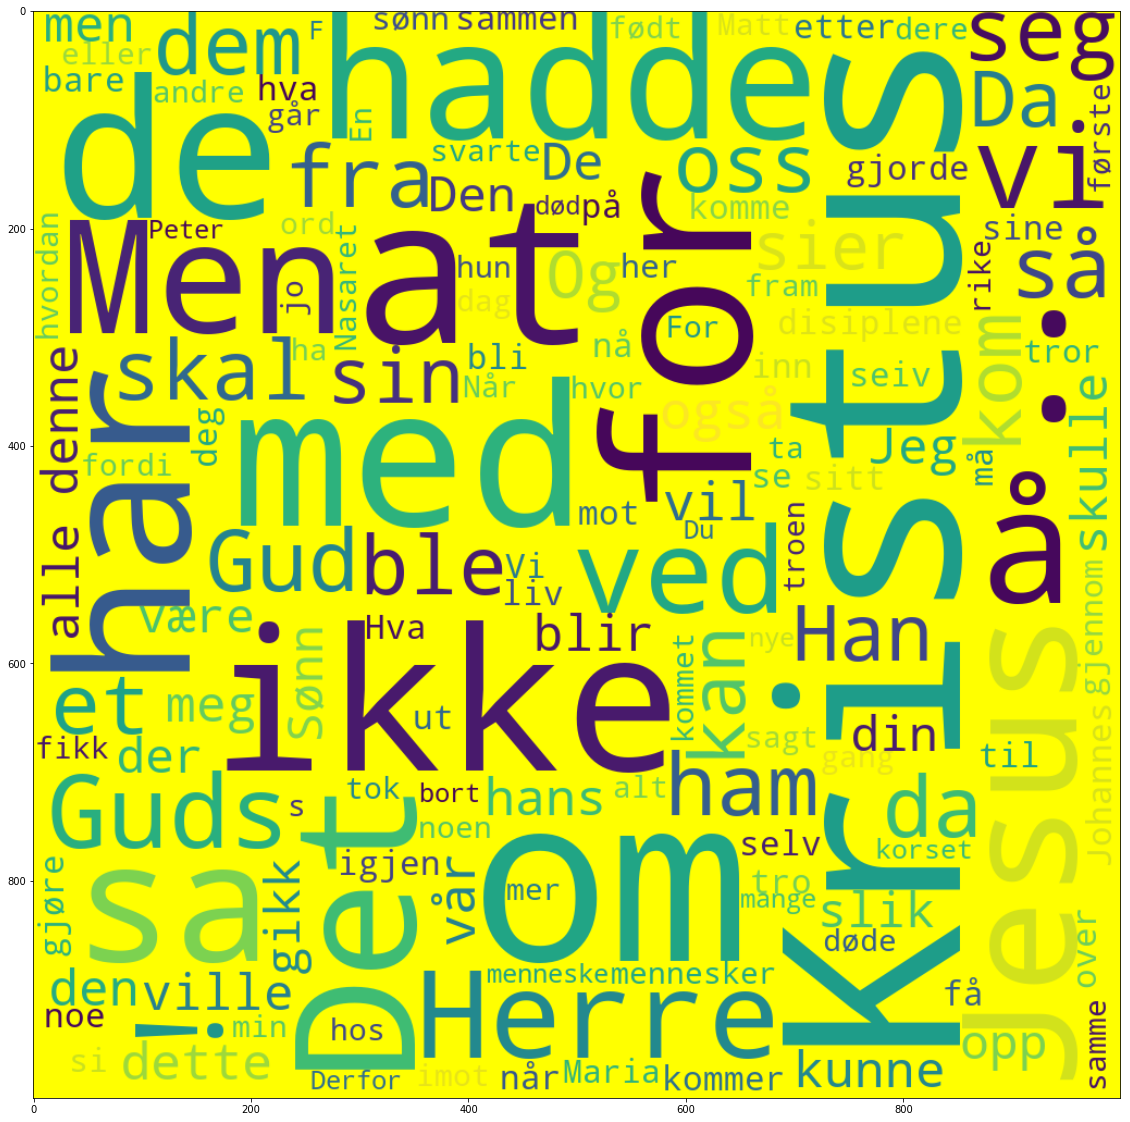

In [7]:
nb.cloud(mcluster.cluster_set(aslist=False)[:150], background='yellow')

In [8]:
korpus = nb.get_urn({'ddk':'230%'})

In [9]:
jesus = gnl.make_collocation_graph('Jesus', urns=korpus, cutoff=30, top=30)

In [19]:
gnl.show_cliques(jesus)

(3, 1) himmelske, Jesus, oppstandne, Herre, Kristus, min, Messias, Frelser

(3, 2) orde, vitne, påske, grunn, troens

(3, 3) Del, Hvem, meditasjon

(3, 4) Da, innstiftet, gav, sa

(4, 1) Kristus, oppstandne, Herre, Frelser



In [20]:
gnl.show_community(jesus)

1 Figur, inntrykk, forkynner, talte, skulle, Plads, Messias, folks, jomfru, under, korsfestet, s, opprør, ferdig, hodet, oldkirken, dø, utgjør, jødene, gjeldende, Jesus, ble, levende, kyrkan, løftene, lide, ham, fortapt, To, graven, Historien, Du, kristologiske, virket, funnet, kongen, gjorde, f, Sønn, menneskeslektens

2 att, historiska, betraktning, vara, boka, ville, maste, till, ar, inte, nytestamentlig, från, Min, frukt

3 Testamentet, usynlige, Herre, konge, Salmer, lovet, forening, lidende, møtte, dommer, Skaper, møtt, himmelske, samler, fullkomne, venn, framstillingen, mine, tilbe, møter, Frelser, Kristus, herre, vor, sendte, Paul, min, driver, Adam, møte, troen, sentrum, lovens, Deres, oppstandne, åpenbaringen, ditt, kosmisk, bekjenne, nærværende, dog, kaster, historiens, menneskehetens, deg

4 mitt, mente, brødet, hørt, Siden, syndere, sa, jødedommen, Galilea, byen, svarte, samles, navnet, Nasaret, identisk, henne, Da, mannen, øye, fortelles, fødes, Josef, by, spise

5 nattve

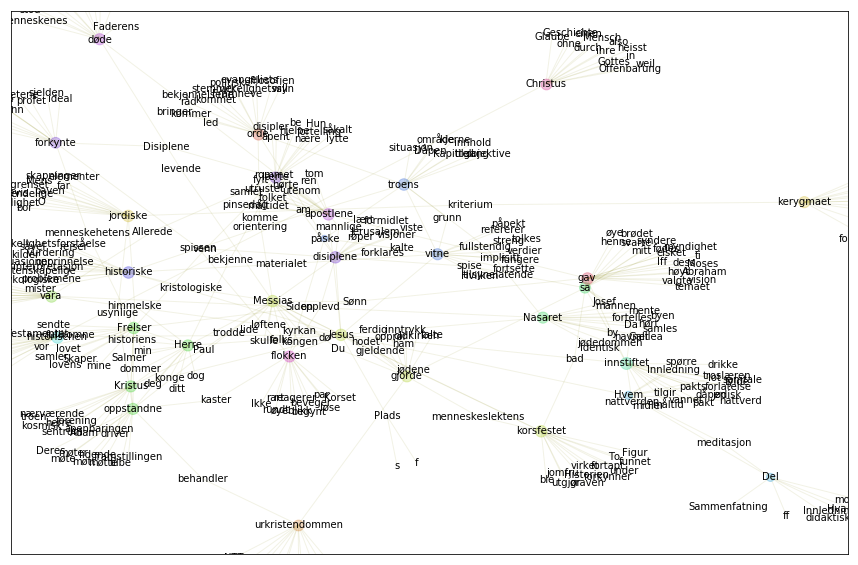

In [31]:
gnl.show_graph(jesus, deltax=0, deltay=0, spread=0.09)

In [33]:
nb.central_betweenness_characters(jesus)

[('Jesus', 0.6566096483471138),
 ('Herre', 0.15518741433435074),
 ('historischen', 0.15320334261838442),
 ('jordiske', 0.13285360569483134),
 ('apostlene', 0.13116766886265477),
 ('Kristus', 0.12525150697852636),
 ('Messias', 0.12301032777704106),
 ('himmelske', 0.11673578871350468),
 ('gjorde', 0.115986499830511),
 ('disiplene', 0.11052195865450279)]

In [34]:
nb.central_characters(jesus)

[('innstiftet', 0.04722222222222222),
 ('Jesus', 0.044444444444444446),
 ('vara', 0.044444444444444446),
 ('historischen', 0.044444444444444446),
 ('korsfestet', 0.044444444444444446),
 ('historiske', 0.044444444444444446),
 ('disiplene', 0.044444444444444446),
 ('Messias', 0.044444444444444446),
 ('apostlene', 0.044444444444444446),
 ('Frelser', 0.044444444444444446)]

In [35]:
sub = jesus.subgraph([n[0] for n in jesus.degree() if n[1]>1])

In [37]:
gnl.show_cliques(sub)

(3, 1) Del, Hvem, meditasjon

(3, 2) himmelske, Jesus, oppstandne, Herre, Kristus, min, Messias, Frelser

(3, 3) orde, vitne, påske, grunn, troens

(3, 4) Da, innstiftet, gav, sa

(4, 1) oppstandne, Frelser, Herre, Kristus



In [38]:
gnl.show_community(sub)

1 opplevd, trodde, flokken, spissen, Disiplene, disiplene, kaster, spise, menneskehetens, forkynte

2 kerygmaet, usynlige, jordiske, kriterium

3 himmelske, oppstandne, Frelser, Herre, Paul, komme, min, Messias, Sønn, Kristus

4 Jesus, am, meditasjon, Hvem, Plads, Del, historischen, Christus

5 døde, levende, lærte, led, venn, vara, Allerede, bekjenne, apostlene, mannlige, Siden

6 orientering, kristologiske, orde, påske, grunn, troens, materialet, vitne, historiske

7 fullstendig, innstiftet, Nasaret, Josef, gav, Da, mannen, sa

8 bad, behandler, korsfestet, menneskeslektens, gjorde, jødene, urkristendommen, Du



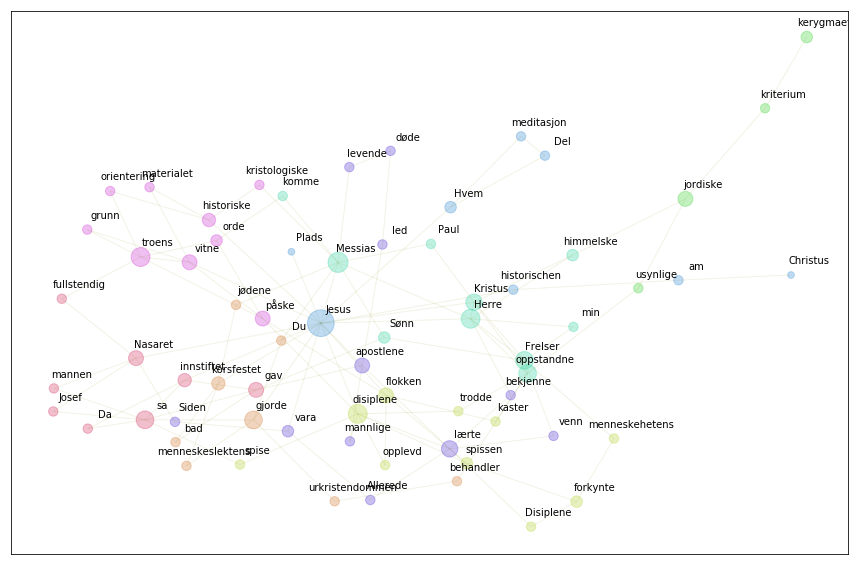

In [39]:
gnl.show_graph(sub)

In [42]:
kvinne = gnl.make_collocation_graph('kvinner', urns=korpus, top=30, cutoff=30)

In [43]:
cutdown = lambda x: x.subgraph([n[0] for n in x.degree() if n[1]>1])

In [44]:
kvinnec = cutdown(kvinne)

In [45]:
gnl.show_cliques(kvinnec)

(3, 1) feministiske, menn, generelle, kvinner, Kvinner, dagens, spirituelle, bekostning, oppgaver, roller, funksjoner, spiritualitet, riktige

(3, 2) positiv, frigjørende, presentere

(3, 3) kulturell, gruppe, sosial

(3, 4) sosial, politisk, frigjøring, positiv

(3, 5) jenter, jentene, riktige, gutter

(3, 6) frigjørende, perspektivet, potensial, kritisk

(3, 7) dikotome, menn, kjønn

(4, 1) kvinner, Kvinner, menn, roller



In [46]:
gnl.show_cliques(kvinne)

(3, 1) gruppe, kulturell, sosial

(3, 2) sosial, politisk, frigjøring, positiv

(3, 3) feministiske, menn, generelle, kvinner, Kvinner, dagens, spirituelle, bekostning, oppgaver, roller, funksjoner, spiritualitet, riktige

(3, 4) dikotome, kjønn, menn

(3, 5) jenter, jentene, riktige, gutter

(3, 6) frigjørende, perspektivet, potensial, kritisk

(3, 7) positiv, frigjørende, presentere

(4, 1) kvinner, Kvinner, menn, roller



In [48]:
gnl.show_community(kvinnec)

1 menn, kjønnsidentitet, Kvinner, utfoldelse, maskuline, bekostning, oppgaver, identitet, gaver, funksjoner, roller, dikotome, kjønn

2 kriterier, hvilke, kvinner, frigjør, kvinners, utfordrer, menns, resten, markert, dele

3 Lundgren, nærliggende, ren, sjelden, oppfatninger, teolog, fortiden, brukte, generelt, kirkesamfunn, vold, angrep, implisitt, Mange, eksplisitt, fortellinger, møtt

4 kulturell, gruppe, visjon, frigjøring, positiv, evner, klargjøre, grupper, hørte, Uten, politisk, sosial, røster, fordel

5 frigjørende, verdier, stort, perspektivet, talte, potensial, kritisk, presentere, holisme

6 feministiske, utvikle, generelle, dagens, spirituelle, spiritualitet

7 jenter, mannlig, riktige, gutter, identifisere, jentene, refleksjon, unge, regnet, ekte



In [49]:
gnl.show_community(kvinne)

1 opplevd, menn, forbundet, viktigere, kvinner, avstand, utan, bekostning, valgte, vokse, Herrmann, byen, anta, Kvinner, mønster, aktivitet, opptrer, gutter, stilt, forsvinner, utfoldelse, desto, diskusjonen, jentene, riktige, nokså, beveger, argumentasjon, systematisk, mottar, derved, forskjell, erkjennelsen, materialet, tvers, fantes, jenter, ytterligere, feil, ramme, identifiserer, norm, roller, meninger

2 kvinnelighet, barns, hjelper, menns, markert, resten, teorier, tilsynelatende, erfaringer, stykke, menneskelighet, avspeiler, påpekt

3 kriterier, brødet, Skal, visjon, vinen, utfordrer, nød, visdom, dele, formidle, mat, Deres, hjelpe

4 teorien, kontekst, hensyn, bestemte, ulike, altfor, grupper, hørte, disipler, trygghet, størst, nyttig, forbi, kulturell, gruppe, led, dominerende, familie, prester, ordning, stadium, vanskelige, virksomhet, presenterer, små, innen, sml, røster, fordel, kategorier, ukjent, mannlig, religiøs, sosial, status, aktiv

5 forbinder, kvinners, samfunn, 

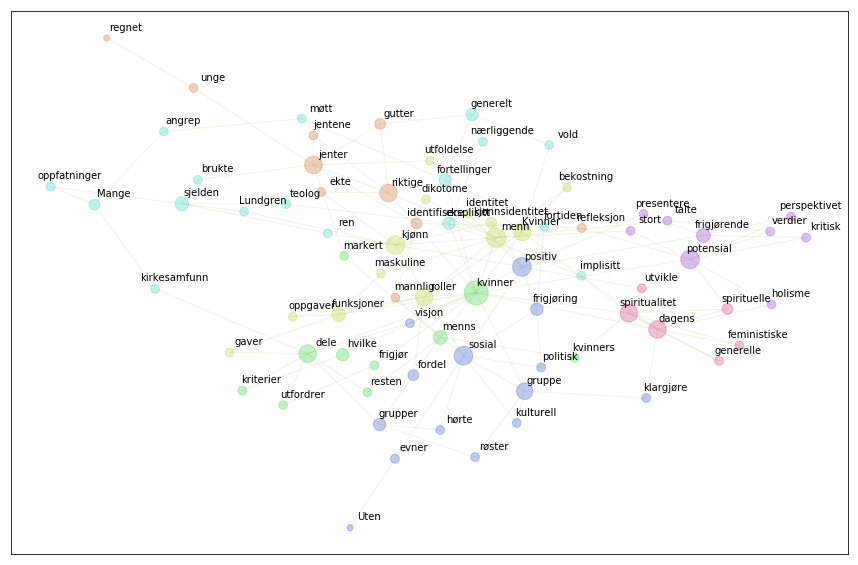

In [47]:
gnl.show_graph(kvinnec)

In [52]:
nb.central_betweenness_characters(kvinnec,n=20)

[('kvinner', 0.44681854870930504),
 ('sosial', 0.1414926265766602),
 ('dele', 0.1314457018238531),
 ('potensial', 0.12741970136928127),
 ('menn', 0.12253618619164841),
 ('positiv', 0.10945205588062733),
 ('jenter', 0.10196162381036332),
 ('riktige', 0.10014229468010982),
 ('gruppe', 0.08834224443468146),
 ('kjønn', 0.08022697035302079),
 ('Kvinner', 0.07924653933057296),
 ('fortellinger', 0.07604012856113697),
 ('spiritualitet', 0.07006250829780242),
 ('dagens', 0.06053946053946054),
 ('eksplisitt', 0.05557709486280915),
 ('sjelden', 0.05016349197021465),
 ('menns', 0.044841666270237696),
 ('frigjørende', 0.032448270683564796),
 ('roller', 0.03157437800294943),
 ('identifisere', 0.02600233566620121)]

In [53]:
nb.central_betweenness_characters(kvinne,n=20)

[('kvinner', 0.5294618976961191),
 ('fortellinger', 0.18164849391437082),
 ('sosial', 0.17761699458981559),
 ('jenter', 0.1498610710937513),
 ('menn', 0.14547999730087488),
 ('dele', 0.13762522287605802),
 ('riktige', 0.1256251110710057),
 ('gruppe', 0.12023571246311449),
 ('potensial', 0.1136318123651707),
 ('eksplisitt', 0.0891396204792868),
 ('positiv', 0.08879473443533094),
 ('kjønn', 0.08559514425909681),
 ('identifisere', 0.08310974826124422),
 ('møtt', 0.07865636482495876),
 ('frigjør', 0.07581683718324012),
 ('talte', 0.07475557680974612),
 ('generelt', 0.07328078725911129),
 ('evner', 0.07263136538851694),
 ('sjelden', 0.07156034998025727),
 ('hvilke', 0.07063371301046285)]